In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from pathlib import Path

In [2]:
## we are going to hardcode the column names, because this just makes it a little easier to use pandas.

names = ['word_freq_make:        ',
'word_freq_address:     ',
'word_freq_all:         ',
'word_freq_3d:          ',
'word_freq_our:         ',
'word_freq_over:        ',
'word_freq_remove:      ',
'word_freq_internet:    ',
'word_freq_order:       ',
'word_freq_mail:        ',
'word_freq_receive:     ',
'word_freq_will:        ',
'word_freq_people:      ',
'word_freq_report:      ',
'word_freq_addresses:   ',
'word_freq_free:        ',
'word_freq_business:    ',
'word_freq_email:       ',
'word_freq_you:         ',
'word_freq_credit:      ',
'word_freq_your:        ',
'word_freq_font:        ',
'word_freq_000:         ',
'word_freq_money:       ',
'word_freq_hp:          ',
'word_freq_hpl:         ',
'word_freq_george:      ',
'word_freq_650:         ',
'word_freq_lab:         ',
'word_freq_labs:        ',
'word_freq_telnet:      ',
'word_freq_857:         ',
'word_freq_data:        ',
'word_freq_415:         ',
'word_freq_85:          ',
'word_freq_technology:  ',
'word_freq_1999:        ',
'word_freq_parts:       ',
'word_freq_pm:          ',
'word_freq_direct:      ',
'word_freq_cs:          ',
'word_freq_meeting:     ',
'word_freq_original:    ',
'word_freq_project:     ',
'word_freq_re:          ',
'word_freq_edu:         ',
'word_freq_table:       ',
'word_freq_conference:  ',
'char_freq_;:           ',
'char_freq_(:           ',
'char_freq_[:           ',
'char_freq_!:           ',
'char_freq_$:           ',
'char_freq_#:           ',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total: ',
'label']
          

In [3]:
## Load in the dataset here 
data_location = 'spambase.csv'
data = pd.read_csv(data_location, names = names)
X = data.drop('label', axis = 1)
y = data.label

In [4]:
data.describe()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average,capital_run_length_longest,capital_run_length_total:,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
data.head()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average,capital_run_length_longest,capital_run_length_total:,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
data.isnull().any().sum()

0

In [7]:
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [8]:
data.label.sum()/data.shape[0]  #will tell us spam count

0.39404477287546186

In [9]:
y.value_counts() #same thing

label
0    2788
1    1813
Name: count, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,stratify=y)

In [11]:
## Train the model
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
## get predictions from the model on the training data and the testing data
predictionTrain=clf.predict(X_train)
print(predictionTrain)

[0 1 0 ... 0 1 1]


In [13]:
predictionTest=clf.predict(X_test)

In [14]:
## evaluate the predictions
## Note that the order of the arguments is **very** important for f1-score
f1Train=f1_score(y_train,predictionTrain)
print(f1Train)


1.0


In [15]:
f1Test=f1_score(y_test,predictionTest)
print(f1Test)

0.8658247829518547


In [16]:
train_results = []
test_results = []
for i in range(2,50): # feel free to change these, I just threw out a reasonable option here.
    
    dtc = DecisionTreeClassifier(max_depth=i)  #select a parameter to check
    dtc.fit(X_train,y_train)                                 # train the model
    predictionTrain1=dtc.predict(X_train)
    predictionTest1=dtc.predict(X_test)                                  # get predictions for both training and test
    f1Train1=f1_score(y_train,predictionTrain1)
    train_results.append(f1Train1)                                 # evaluate them and append them into the our lists.
    f1Test1=f1_score(y_test,predictionTest1)
    test_results.append(f1Test1)
print(train_results)
print ( " ")
print (test_results)

[0.8024691358024691, 0.8628571428571429, 0.8895348837209301, 0.9101338432122371, 0.9255725190839694, 0.9374398460057748, 0.9486692015209125, 0.9549376797698945, 0.9608404966571156, 0.9680451127819548, 0.9757009345794393, 0.9812734082397003, 0.9898053753475441, 0.9944547134935305, 0.996309963099631, 0.998158379373849, 0.998158379373849, 0.9990817263544537, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 
[0.811195024433585, 0.8592411260709915, 0.8716244287494807, 0.8735063864853729, 0.8782894736842106, 0.8673596673596673, 0.8776683087027914, 0.8713280926768722, 0.8745901639344263, 0.8718572587185727, 0.8670148654077943, 0.8715263793797825, 0.868943606036537, 0.8715305313243458, 0.8708020545239036, 0.8666140489344909, 0.8659874608150471, 0.8650980392156864, 0.867061143984221, 0.8612626656274357, 0.8666140489344909, 0.868575912122401, 0.8661417322834646, 0.8635294117647059, 0.86116542823

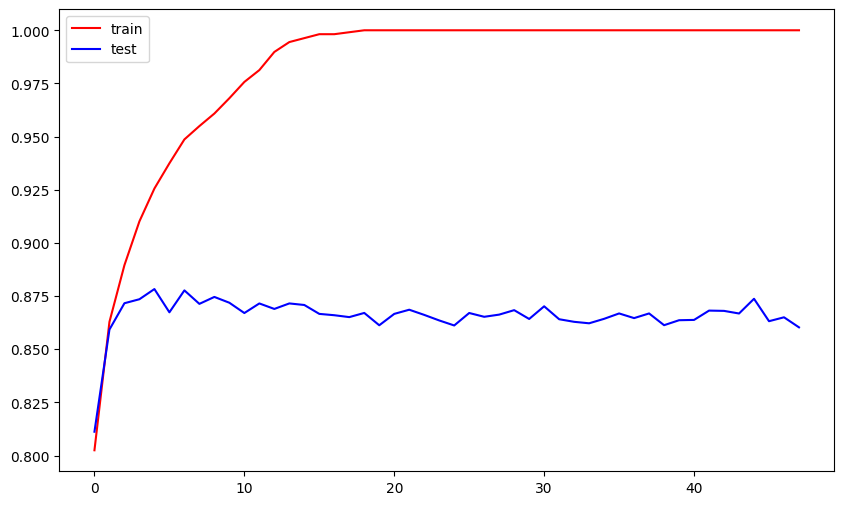

In [17]:
fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.legend()

In [18]:
train_results = []
test_results = []
for i in range(2,50): # feel free to change these, I just threw out a reasonable option here.
    
    dtc = DecisionTreeClassifier(min_samples_split=i)  #select a parameter to check
    dtc.fit(X_train,y_train)                                 # train the model
    predictionTrain1=dtc.predict(X_train)
    predictionTest1=dtc.predict(X_test)                                  # get predictions for both training and test
    f1Train1=f1_score(y_train,predictionTrain1)
    train_results.append(f1Train1)                                 # evaluate them and append them into the our lists.
    f1Test1=f1_score(y_test,predictionTest1)
    test_results.append(f1Test1)
print(train_results)
print ( " ")
print (test_results)

[1.0, 0.9990800367985281, 0.9954001839926404, 0.9935483870967743, 0.9926199261992621, 0.9862005519779209, 0.9834254143646408, 0.9777777777777777, 0.974169741697417, 0.9704797047970479, 0.967741935483871, 0.9605866177818515, 0.9597069597069599, 0.9597069597069599, 0.9549218031278749, 0.9522935779816515, 0.9471733086190918, 0.9471733086190918, 0.9471733086190918, 0.9471733086190918, 0.9471733086190918, 0.9471733086190918, 0.9471733086190918, 0.9471733086190918, 0.9439853076216714, 0.9430147058823529, 0.9391143911439115, 0.9391143911439115, 0.9391143911439115, 0.93836246550138, 0.93836246550138, 0.93836246550138, 0.93836246550138, 0.93836246550138, 0.9373848987108656, 0.9373848987108656, 0.931098696461825, 0.931098696461825, 0.931098696461825, 0.931098696461825, 0.931098696461825, 0.931098696461825, 0.931098696461825, 0.931098696461825, 0.9312557286892758, 0.9312557286892758, 0.9312557286892758, 0.9312557286892758]
 
[0.8685039370078741, 0.8659064097522612, 0.8622047244094488, 0.868839427

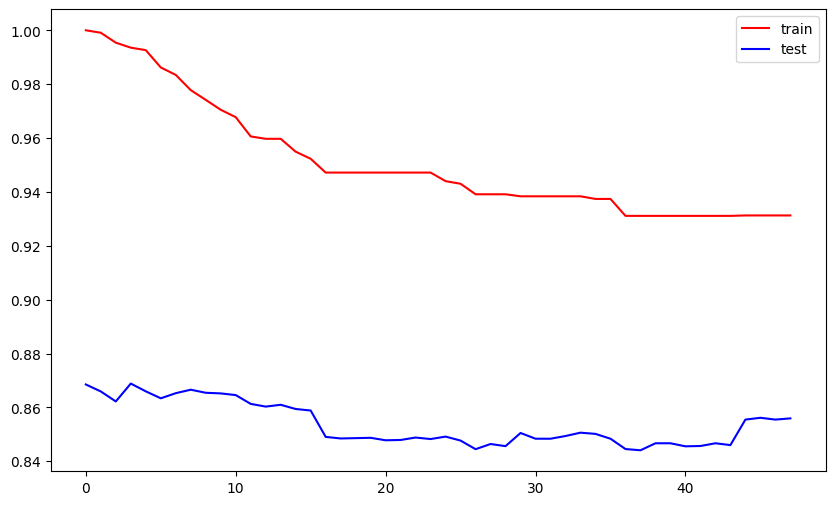

In [19]:
fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.legend()

In [20]:
train_results = []
test_results = []
for i in range(2,50): # feel free to change these, I just threw out a reasonable option here.
    
    dtc = DecisionTreeClassifier(min_samples_leaf=i)  #select a parameter to check
    dtc.fit(X_train,y_train)                                 # train the model
    predictionTrain1=dtc.predict(X_train)
    predictionTest1=dtc.predict(X_test)                                  # get predictions for both training and test
    f1Train1=f1_score(y_train,predictionTrain1)
    train_results.append(f1Train1)                                 # evaluate them and append them into the our lists.
    f1Test1=f1_score(y_test,predictionTest1)
    test_results.append(f1Test1)
print(train_results)
print ( " ")
print (test_results)

[0.9765258215962442, 0.9620721554116559, 0.9510618651892889, 0.9377901578458682, 0.9312267657992566, 0.9211009174311927, 0.9101123595505619, 0.9067873303167421, 0.9051094890510949, 0.8991674375578168, 0.8953271028037384, 0.8890942698706099, 0.89171974522293, 0.889090909090909, 0.8799249530956849, 0.8880666049953746, 0.892925430210325, 0.892925430210325, 0.8934967012252591, 0.8934967012252591, 0.8934967012252591, 0.8934967012252591, 0.8929889298892988, 0.8929889298892988, 0.8848263254113345, 0.8838060384263495, 0.8817598533455545, 0.8801463860933211, 0.8707607699358386, 0.8686868686868686, 0.8638941398865784, 0.8736263736263736, 0.8725939505041247, 0.8770642201834862, 0.8606921029281278, 0.8599290780141845, 0.8506375227686703, 0.8506375227686703, 0.8506375227686703, 0.8458715596330275, 0.8458715596330275, 0.8458715596330275, 0.8458715596330275, 0.845096241979835, 0.8443223443223444, 0.8435852372583481, 0.8428446005267778, 0.8340971585701192]
 
[0.8647773279352226, 0.8620007908264137, 0.

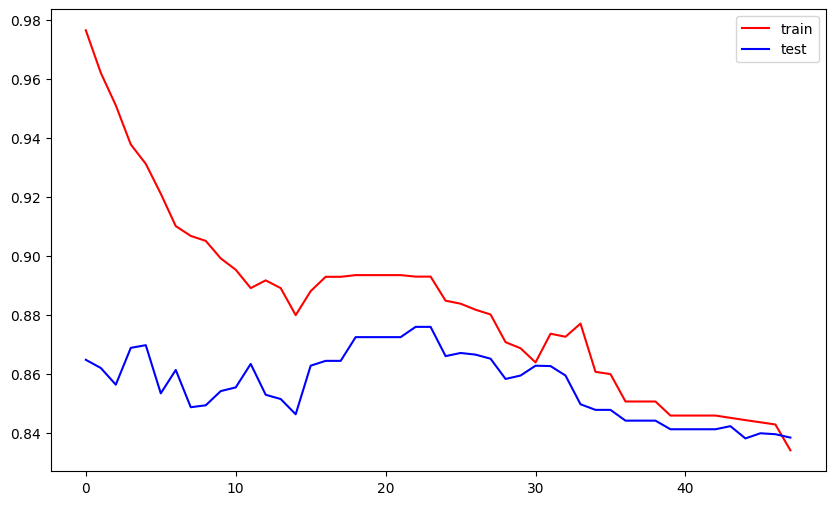

In [21]:
fig,ax = plt.subplots(figsize = (10,6));
ax.plot(train_results, color = 'r', label = 'train')
ax.plot(test_results, color = 'b', label = 'test')
ax.legend()